# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [2]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [4]:
# Define 1D linear regression model
def f(x, phi0, phi1):

  y = phi0 + phi1*x
  return y

In [5]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

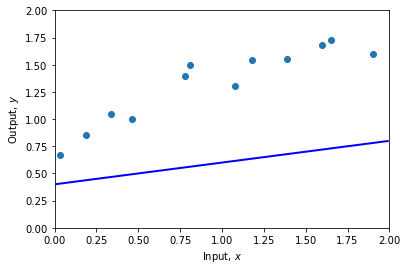

In [11]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2

# Plot the data and the model
plot(x,y,phi0,phi1)



In [10]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):

  loss = 0
  # We can make an array of the predicted y values given these phi parameters below with array 'x'
  predicted_ys = phi0 + phi1 * x
  # Same idea - using the actual y's and the predicted w/ the parameters find the squared differences 
  squared_differences = (y - predicted_ys) ** 2

  # Add em all up to get the total loss w/ the predicted vs actual
  loss = np.sum(squared_differences)

  return loss

In [15]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth = 7.07')
print('Got it.')

Your Loss = 7.07, Ground truth = 7.07
Got it.


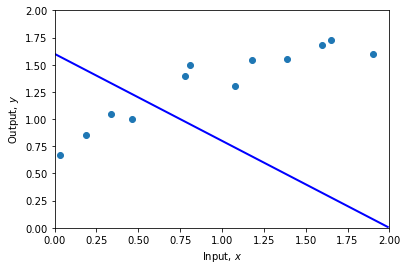

Your Loss = 10.28, Ground truth = 10.28


In [17]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth = 10.28')

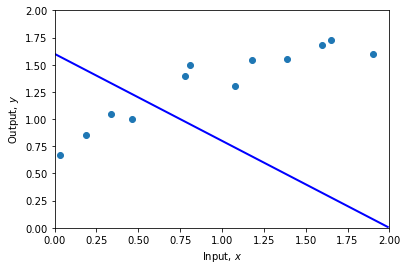

Your Starting Loss = 10.28


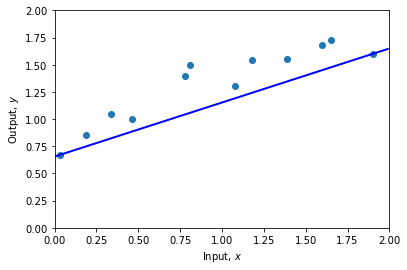

Initial Loss using first/last points = 0.66

Iteration 0: Loss = 0.5873, phi0 = 0.6629, phi1 = 0.5051
Iteration 200: Loss = 0.2016, phi0 = 0.8039, phi1 = 0.5415
Iteration 400: Loss = 0.2000, phi0 = 0.8202, phi1 = 0.5273
Iteration 600: Loss = 0.1999, phi0 = 0.8244, phi1 = 0.5236
Iteration 800: Loss = 0.1999, phi0 = 0.8255, phi1 = 0.5226


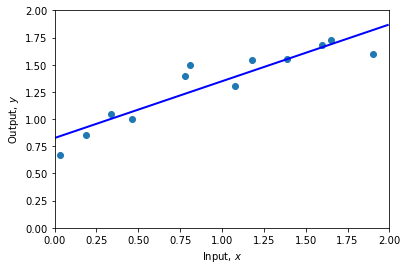

Final Loss using gradient function = 0.19987


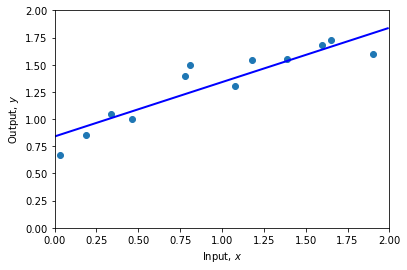

Final Loss (from book) = 0.20252
Our function was able to (just barely) beat the book! Nice.


In [44]:
# Gradient descent function to minimize loss
def minimize_loss(x, y, phi0, phi1, learning_rate=0.02, iterations=1000):
    m = len(y)  # Number of data points
    
    for i in range(iterations):
        # Calculate the predictions
        y_pred = phi0 + phi1 * x
        
        # Compute the gradients
        d_phi0 = -(2/m) * np.sum(y - y_pred)
        d_phi1 = -(2/m) * np.sum((y - y_pred) * x)
        
        # Update the parameters
        phi0 = phi0 - learning_rate * d_phi0
        phi1 = phi1 - learning_rate * d_phi1
        
        # Optionally print the loss every 200 iterations for tracking
        if i % 200 == 0:
            current_loss = compute_loss(x, y, phi0, phi1)
            print(f'Iteration {i}: Loss = {current_loss:3.4f}, phi0 = {phi0:3.4f}, phi1 = {phi1:3.4f}')
    
    return phi0, phi1

# Quick function just to give a start slope based off of first and last point
def start_slope(x, y):
    # Ensure there are at least two points
    if len(x) < 2 or len(y) < 2:
        raise ValueError("Arrays must have at least two elements.")
    
    # Calculate the slope (delta y / delta x)
    slope = (y[-1] - y[0]) / (x[-1] - x[0])
    
    return slope

# Example usage
phi0 = 1.60
phi1 = -0.8
startingLoss = compute_loss(x, y, phi0, phi1)
plot(x, y, phi0, phi1)
print(f'Your Starting Loss = {startingLoss:3.2f}')

# Start with initial slope and bias
phi1 = start_slope(x, y)
phi0 = y[0] - x[0] * phi1

# Plot initial line
plot(x, y, phi0, phi1)
print(f'Initial Loss using first/last points = {compute_loss(x, y, phi0, phi1):3.2f}\n')

# Minimize the loss
phi0, phi1 = minimize_loss(x, y, phi0, phi1)

# Plot the line after minimizing the loss
plot(x, y, phi0, phi1)
final_loss = compute_loss(x, y, phi0, phi1)
print(f'Final Loss using gradient function = {final_loss:3.5f}')

phi0 = .84
phi1 = .5
plot(x, y, phi0, phi1)
final_loss = compute_loss(x, y, phi0, phi1)
print(f'Final Loss (from book) = {final_loss:3.5f}')
print('Our function was able to (just barely) beat the book! Nice.')



# Visualizing the loss function

The above process is equivalent to descending coordinate wise on the loss function<br>

Now let's plot that function

In [41]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


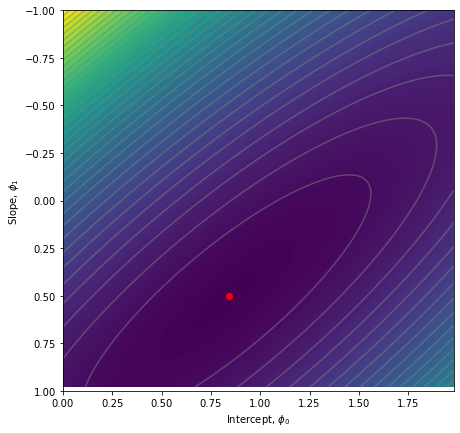

Looks about right


In [45]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()
print("Looks about right")